<a href="https://colab.research.google.com/github/pea-sys/Til/blob/master/PyTorch_Tutorials_BegginerBlitz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Original](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
# Getting Started


# Tensors

In [0]:
from __future__ import print_function
import torch

初期化されていないマトリックスが宣言されていますが、使用される前に明確な既知の値が含まれていません。初期化されていないマトリックスが作成されると、その時点で割り当てられたメモリにあった値が初期値として表示されます。

In [2]:
x = torch.empty(5, 3)
print(x)

tensor([[3.4053e-36, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 2.8026e-45],
        [0.0000e+00, 1.1210e-44, 0.0000e+00],
        [1.4013e-45, 0.0000e+00, 0.0000e+00]])


In [3]:
x = torch.rand(5, 3)
print(x)

tensor([[0.6833, 0.8213, 0.0148],
        [0.5770, 0.4337, 0.6391],
        [0.0227, 0.6080, 0.0616],
        [0.0816, 0.6485, 0.8664],
        [0.1652, 0.8055, 0.3425]])



ゼロで満たされたdtype longの行列を作成します。

In [4]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])



データからテンソルを直接構築します。

In [5]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


または、既存のテンソルに基づいてテンソルを作成します。ユーザーが新しい値を提供しない限り,これらのメソッドは、入力テンソルのプロパティを再利用します。

In [6]:
x = x.new_ones(5, 3, dtype=torch.double)      # new_* methods take in sizes
print(x)

x = torch.randn_like(x, dtype=torch.float)    # override dtype!
print(x)                                      # result has the same size

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[-1.0737,  0.7733, -1.7551],
        [-0.5004, -1.2820,  1.3587],
        [-0.3883,  1.3063, -0.3548],
        [-0.2154,  0.4203, -0.8156],
        [ 0.4530,  0.1988, -0.8683]])


In [7]:
print(x.size())

torch.Size([5, 3])


# Operations

操作には複数の構文があります。次の例では、加算操作を見ていきます。

In [8]:
y = torch.rand(5, 3)
print(x + y)

tensor([[-0.1478,  1.1331, -0.8321],
        [ 0.1914, -1.0335,  2.3528],
        [ 0.4262,  2.2252,  0.4037],
        [-0.1270,  1.1167, -0.2670],
        [ 0.8721,  0.5668, -0.6724]])


In [9]:
print(torch.add(x, y))

tensor([[-0.1478,  1.1331, -0.8321],
        [ 0.1914, -1.0335,  2.3528],
        [ 0.4262,  2.2252,  0.4037],
        [-0.1270,  1.1167, -0.2670],
        [ 0.8721,  0.5668, -0.6724]])


引数として出力テンソルを提供する

In [10]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[-0.1478,  1.1331, -0.8321],
        [ 0.1914, -1.0335,  2.3528],
        [ 0.4262,  2.2252,  0.4037],
        [-0.1270,  1.1167, -0.2670],
        [ 0.8721,  0.5668, -0.6724]])


Addition: in-place

In [11]:
# adds x to y
y.add_(x)
print(y)

tensor([[-0.1478,  1.1331, -0.8321],
        [ 0.1914, -1.0335,  2.3528],
        [ 0.4262,  2.2252,  0.4037],
        [-0.1270,  1.1167, -0.2670],
        [ 0.8721,  0.5668, -0.6724]])


標準のNumPyのようなインデックス作成は、すべての添え字で使用できます

In [12]:
print(x[:, 1])

tensor([ 0.7733, -1.2820,  1.3063,  0.4203,  0.1988])


サイズ変更：テンソルのサイズ変更/形状変更を行う場合は、torch.viewを使用できます。

In [13]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


1つの要素のテンソルがある場合、.item（）を使用してPythonの数値として値を取得します

In [14]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([-0.4781])
-0.47805556654930115


# NumPy Bridge

トーチテンソルをNumPy配列に、またはその逆に変換するのは簡単です。

トーチテンソルとNumPyアレイは、基礎となるメモリ位置を共有し（トーチテンソルがCPU上にある場合）、一方を変更すると他方も変更されます。

トーチテンソルからNumPy配列への変換

In [15]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [16]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]



numpy配列の値の変化をご覧ください。

In [17]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]



NumPy配列をトーチテンソルに変換


np配列を変更すると、トーチテンソルがどのように自動的に変更されたかをご覧ください

In [18]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


# CUDA Tensors


.toメソッドを使用して、テンソルを任意のデバイスに移動できます。

In [19]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

tensor([0.5219], device='cuda:0')
tensor([0.5219], dtype=torch.float64)


# AUTOGRAD: AUTOMATIC DIFFERENTIATION

PyTorchのすべてのニューラルネットワークの中心は、autogradパッケージです。最初にこれを簡単に見てみましょう。次に、最初のニューラルネットワークのトレーニングに進みます。

autogradパッケージは、Tensorのすべての操作を自動的に区別します。これは、実行ごとに定義されるフレームワークです。つまり、コードの実行方法によってbackpropが定義され、すべての反復が異なる場合があります。

# Tensor


torch.Tensorは、パッケージの中心的なクラスです。属性.requires_gradをTrueに設定すると、すべての操作の追跡が開始されます。計算が終了したら、.backward（）を呼び出して、すべての勾配を自動的に計算できます。このテンソルの勾配は.grad属性に蓄積されます。

テンソルが履歴を追跡しないようにするには、.detach（）を呼び出して計算履歴からデタッチし、将来の計算が追跡されないようにします。

履歴の追跡（およびメモリの使用）を防ぐために、torch.no_grad（）：でコードブロックをラップすることもできます。モデルには、requires_grad = Trueのトレーニング可能なパラメーターがありますが、勾配は必要ないため、モデルを評価する際に特に役立ちます。

autogradの実装に非常に重要なもう1つのクラス、Functionがあります。

テンソルと関数は相互接続され、計算の完全な履歴をエンコードする非循環グラフを構築します。各テンソルには、Tensorを作成したFunctionを参照する.grad_fn属性があります（ユーザーが作成したTensorを除く-grad_fnはNoneです）。

導関数を計算する場合は、Tensorで.backward（）を呼び出すことができます。 Tensorがスカラーの場合（つまり、1つの要素のデータを保持する場合）、backward（）に引数を指定する必要はありませんが、要素がさらにある場合は、一致する形状のテンソルである勾配引数を指定する必要があります。

In [0]:
import torch

テンソルを作成し、requires_grad = Trueを設定して計算を追跡します

In [21]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)



テンソル操作を行う

In [22]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


yは操作の結果として作成されたため、grad_fnがあります。

In [23]:
print(y.grad_fn)

yでさらに操作を行う

In [24]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


.requires_grad_（...）は、既存のTensorのrequire_gradフラグをその場で変更します。入力フラグは、指定されていない場合のデフォルトのFalseです。

In [25]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


# Gradients

outには単一のスカラーが含まれているため、out.backward（）はout.backward（torch.tensor（1。））と同等です。

In [0]:
out.backward()

Print gradients d(out)/dx

In [27]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])



ベクトルヤコビ積のこの特性により、非スカラー出力を持つモデルに外部勾配を供給することが非常に便利になります。
次に、ベクトルヤコビ積の例を見てみましょう。

In [28]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([-1081.8945,  -593.1576,  -854.6824], grad_fn=<MulBackward0>)


この場合、yはスカラーではなくなりました。 torch.autogradは完全なヤコビアンを直接計算できませんでしたが、ベクトルとヤコビアンの積だけが必要な場合は、単にベクトルを引数として逆方向に渡します。

In [29]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([2.0480e+02, 2.0480e+03, 2.0480e-01])


また、コードブロックをtorch.no_grad（）でラップすることにより、.requires_grad = TrueでTensorの履歴の追跡からautogradを停止することもできます。

In [30]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


In [31]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


# NEURAL NETWORKS

ニューラルネットワークは、torch.nnパッケージを使用して構築できます。

autogradを垣間見ると、nnはautogradに依存してモデルを定義し、モデルを区別します。 nn.Moduleにはレイヤーと、出力を返すforward（input）メソッドが含まれます。

たとえば、数字画像を分類するこのネットワークを見てください：

これは、単純なフィードフォワードネットワークです。入力を受け取り、いくつかのレイヤーを次々に通過させ、最終的に出力を提供します。

ニューラルネットワークの一般的なトレーニング手順は次のとおりです。

* 学習可能なパラメーター（または重み）を持つニューラルネットワークを定義する
* 入力のデータセットを反復処理する
* ネットワークを介した入力の処理
* 損失を計算します（出力が正しいことからどれくらい離れているか）
* 勾配をネットワークのパラメーターに伝播します
* 通常、単純な更新ルールを使用して、ネットワークの重みを更新します：weight = weight-learning_rate * gradient

# Define the network

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


フォワード関数を定義するだけで、autogradを使用してバックワード関数（勾配が計算される）が自動的に定義されます。 forward関数で任意のTensor操作を使用できます。/

In [33]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 3, 3])


ランダムな32x32入力を試してみましょう。注：このネット（LeNet）の予想入力サイズは32x32です。 MNISTデータセットでこのネットを使用するには、データセットから32x32に画像のサイズを変更してください。

In [34]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.0629, -0.0274,  0.1297,  0.0747, -0.0738,  0.0802, -0.0427, -0.0321,
         -0.0746, -0.0661]], grad_fn=<AddmmBackward>)


すべてのパラメーターの勾配バッファーをゼロにし、ランダム勾配でバックプロップします：

In [0]:
net.zero_grad()
out.backward(torch.randn(1, 10))

# Loss Function

損失関数は、入力（出力、ターゲット）のペアを受け取り、出力がターゲットからどれだけ離れているかを推定する値を計算します。

nnパッケージにはいくつかの異なる損失関数があります。単純な損失は、nn.MSELossです。これは、入力とターゲット間の平均二乗誤差を計算します。

In [36]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
print(target)
target = target.view(1, -1)  # make it the same shape as output
print(target)
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor([ 0.3710, -1.0748, -0.0938,  0.8789,  0.0684,  1.5615, -0.0418,  2.5326,
        -0.1765,  0.0957])
tensor([[ 0.3710, -1.0748, -0.0938,  0.8789,  0.0684,  1.5615, -0.0418,  2.5326,
         -0.1765,  0.0957]])
tensor(1.0811, grad_fn=<MseLossBackward>)


ここで、.grad_fn属性を使用して逆方向の損失を追跡すると、次のような計算のグラフが表示されます。

input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d
      -> view -> linear -> relu -> linear -> relu -> linear
      -> MSELoss
      -> loss

したがって、loss.backward（）を呼び出すと、グラフ全体がw.r.tと区別されます。損失と、requires_grad = Trueを持つグラフ内のすべてのTensorには、勾配とともに.grad Tensorが蓄積されます。

例として、後方にいくつかのステップをたどってみましょう。

In [37]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

# Backprop


エラーを逆伝播するために必要なのは、loss.backward（）だけです。ただし、既存のグラデーションをクリアする必要があります。クリアしないと、既存のグラデーションにグラデーションが蓄積されます。

ここで、loss.backward（）を呼び出し、逆方向の前後のconv1のバイアス勾配を見てみましょう。

In [38]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0213, -0.0054, -0.0005, -0.0050,  0.0015, -0.0032])


# Update the weights

実際に使用される最も単純な更新ルールは、確率的勾配降下法（SGD）です。

重み=重み-learning_rate *勾配

In [0]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

ただし、ニューラルネットワークを使用する場合は、SGD、Nesterov-SGD、Adam、RMSPropなどのさまざまな更新ルールを使用する必要があります。これを有効にするために、これらすべてのメソッドを実装する小さなパッケージtorch.optimを構築しました。使い方はとても簡単です。

In [0]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

# TRAINING A CLASSIFIER

ニューラルネットワークを定義し、損失を計算し、ネットワークの重みを更新する方法を見てきました。

データはどうですか？
一般に、画像、テキスト、オーディオ、またはビデオのデータを処理する必要がある場合、numpy配列にデータをロードする標準のPythonパッケージを使用できます。次に、この配列をtorch。* Tensorに変換できます。

画像の場合、Pillow、OpenCVなどのパッケージが便利です
オーディオの場合、scipyやlibrosaなどのパッケージ
テキストの場合は、生のPythonまたはCythonベースの読み込み、またはNLTKとSpaCyが便利です
具体的には、ビジョンのために、Imagenet、CIFAR10、MNISTなどの一般的なデータセットのデータローダーと、イメージのデータトランスフォーマー、つまり、torchvision.datasetsおよびtorch.utils.data.DataLoaderを含むtorchvisionというパッケージを作成しました。

これにより、非常に便利になり、定型的なコードを書く必要がなくなります。

このチュートリアルでは、CIFAR10データセットを使用します。 「飛行機」、「自動車」、「鳥」、「猫」、「鹿」、「犬」、「カエル」、「馬」、「船」、「トラック」のクラスがあります。 CIFAR-10の画像のサイズは3x32x32です。つまり、サイズが32x32ピクセルの3チャンネルカラー画像です。

# Training an image classifier

次の手順を順番に実行します。

torchvisionを使用してCIFAR10トレーニングおよびテストデータセットを読み込み、正規化する

1.  畳み込みニューラルネットワークを定義する
2.  損失関数を定義する
3.  トレーニングデータでネットワークをトレーニングする
4.  テストデータでネットワークをテストする

# 1. Loading and normalizing CIFAR10

トーチビジョンを使用すると、CIFAR10を非常に簡単にロードできます

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

トーチビジョンデータセットの出力は、範囲[0、1]のPILImage画像です。それらを正規化された範囲[-1、1]のテンソルに変換します。   
.. 注意：Windowsで実行しているときにBrokenPipeErrorが発生する場合は、設定してみてください
torch.utils.data.DataLoader（）のnum_workerを0にします。

In [42]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


いくつかのトレーニング画像をお楽しみください。

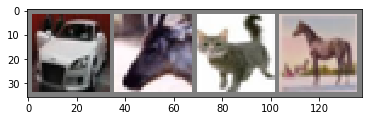

  car  deer   cat horse


In [43]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# 2. Define a Convolutional Neural Network

前にニューラルネットワークセクションからニューラルネットワークをコピーし、（定義された1チャンネル画像ではなく）3チャンネル画像を取得するように変更します。

In [0]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

# 3 3. Define a Loss function and optimizer


運動量のある分類クロスエントロピー損失とSGDを使用しましょう

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# 4. Train the network
これは、物事が面白くなり始めるときです。データイテレータをループし、入力をネットワークに送り、最適化するだけです。

In [46]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.206
[1,  4000] loss: 1.903
[1,  6000] loss: 1.692
[1,  8000] loss: 1.627
[1, 10000] loss: 1.565
[1, 12000] loss: 1.488
[2,  2000] loss: 1.417
[2,  4000] loss: 1.387
[2,  6000] loss: 1.360
[2,  8000] loss: 1.352
[2, 10000] loss: 1.316
[2, 12000] loss: 1.309
Finished Training


In [0]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

# 5. Test the network on the test data
トレーニングデータセットで2パスのネットワークをトレーニングしました。ただし、ネットワークが何かを学習したかどうかを確認する必要があります。

これを確認するには、ニューラルネットワークが出力するクラスラベルを予測し、グラウンドトゥルースと照合します。予測が正しい場合、サンプルを正しい予測のリストに追加します。

さて、最初のステップ。テストセットの画像を表示して、慣れてみましょう。

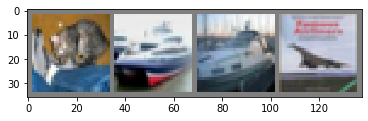

GroundTruth:    cat  ship  ship plane


In [48]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

次に、保存したモデルをロードし直します（注：モデルの保存と再ロードはここでは必要ありません。その方法を説明するためだけに行いました）。

In [49]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

では、ニューラルネットワークが上記の例をどのように考えているのか見てみましょう。

In [0]:
outputs = net(images)

出力は、10クラスのエネルギーです。クラスのエネルギーが高いほど、ネットワークはその画像が特定のクラスのものであると考えます。それでは、最高のエネルギーのインデックスを取得しましょう。

In [51]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car   car  ship


結果はかなり良いようです。

ネットワークがデータセット全体でどのように機能するかを見てみましょう。

In [52]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 51 %


これは、10％の精度（10個のクラスからランダムにクラスを選択する）である偶然よりもはるかに良いように見えます。ネットワークが何かを学んだようです。

うーん、うまく機能したクラスとうまく機能しなかったクラスは何ですか：

In [53]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 62 %
Accuracy of   car : 81 %
Accuracy of  bird : 34 %
Accuracy of   cat : 32 %
Accuracy of  deer : 27 %
Accuracy of   dog : 40 %
Accuracy of  frog : 77 %
Accuracy of horse : 43 %
Accuracy of  ship : 61 %
Accuracy of truck : 59 %


さて、次は何ですか？

これらのニューラルネットワークをGPUで実行するにはどうすればよいですか？

# Training on GPU
TensorをGPUに転送するのと同じように、ニューラルネットをGPUに転送します。

CUDAを利用できる場合、最初に表示されるcudaデバイスとしてデバイスを定義しましょう。

In [54]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


このセクションの残りの部分では、デバイスがCUDAデバイスであると想定しています。

次に、これらのメソッドはすべてのモジュールを再帰的に調べて、パラメーターとバッファーをCUDAテンソルに変換します。

In [55]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


すべてのステップで入力とターゲットもGPUに送信する必要があることに注意してください。

In [0]:
inputs, labels = data[0].to(device), data[1].to(device)

CPUと比較して大幅な高速化に気付かないのはなぜですか？あなたのネットワークは本当に小さいから

# OPTIONAL: DATA PARALLELISM
このチュートリアルでは、DataParallelを使用して複数のGPUを使用する方法を学習します。

PyTorchでGPUを使用するのは非常に簡単です。モデルをGPUに配置できます。  


```
device = torch.device("cuda:0")
model.to(device)
```
次に、すべてのテンソルをGPUにコピーできます。


```
mytensor = my_tensor.to(device)
```

my_tensor.to（device）を呼び出すだけで、my_tensorを書き換える代わりに、GPUでmy_tensorの新しいコピーが返されることに注意してください。新しいテンソルに割り当てて、GPUでそのテンソルを使用する必要があります。

複数のGPUで前方伝播、後方伝播を実行するのは自然です。ただし、Pytorchはデフォルトで1つのGPUのみを使用します。 DataParallelを使用してモデルを並列実行することにより、複数のGPUで操作を簡単に実行できます。


```
model = nn.DataParallel(model)
```

これが、このチュートリアルの背後にあるコアです。以下で詳しく説明します。





# Imports and parameters
PyTorchモジュールをインポートし、パラメーターを定義します。

In [0]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# Parameters and DataLoaders
input_size = 5
output_size = 2

batch_size = 30
data_size = 100

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Dummy DataSet
ダミー（ランダム）データセットを作成します。あなただけのgetitemを実装する必要があります

In [0]:
class RandomDataset(Dataset):

    def __init__(self, size, length):
        self.len = length
        self.data = torch.randn(length, size)

    def __getitem__(self, index):
        return self.data[index]

    def __len__(self):
        return self.len

rand_loader = DataLoader(dataset=RandomDataset(input_size, data_size),
                         batch_size=batch_size, shuffle=True)


# Simple Model
デモでは、モデルは入力を取得し、線形演算を実行し、出力を生成します。ただし、任意のモデル（CNN、RNN、Capsule Netなど）でDataParallelを使用できます。

入力および出力テンソルのサイズを監視するために、モデル内にprintステートメントを配置しました。バッチランク0で印刷されるものに注意してください。

In [0]:
class Model(nn.Module):
    # Our model

    def __init__(self, input_size, output_size):
        super(Model, self).__init__()
        self.fc = nn.Linear(input_size, output_size)

    def forward(self, input):
        output = self.fc(input)
        print("\tIn Model: input size", input.size(),
              "output size", output.size())

        return output

# Create Model and DataParallel
これはチュートリアルの中心部分です。まず、モデルインスタンスを作成し、複数のGPUがあるかどうかを確認する必要があります。複数のGPUがある場合、nn.DataParallelを使用してモデルをラップできます。次に、model.to（device）によってGPUにモデルを配置できます

In [61]:
model = Model(input_size, output_size)
if torch.cuda.device_count() > 1:
  print("Let's use", torch.cuda.device_count(), "GPUs!")
  # dim = 0 [30, xxx] -> [10, ...], [10, ...], [10, ...] on 3 GPUs
  model = nn.DataParallel(model)

model.to(device)

Model(
  (fc): Linear(in_features=5, out_features=2, bias=True)
)

# Run the Model
これで、入力テンソルと出力テンソルのサイズを確認できます。

In [62]:
for data in rand_loader:
    input = data.to(device)
    output = model(input)
    print("Outside: input size", input.size(),
          "output_size", output.size())

	In Model: input size torch.Size([30, 5]) output size torch.Size([30, 2])
Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
	In Model: input size torch.Size([30, 5]) output size torch.Size([30, 2])
Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
	In Model: input size torch.Size([30, 5]) output size torch.Size([30, 2])
Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
	In Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
Outside: input size torch.Size([10, 5]) output_size torch.Size([10, 2])


In [65]:
!apt-get install lshw
!lshw

Reading package lists... Done
Building dependency tree       
Reading state information... Done
lshw is already the newest version (02.18-0.1ubuntu6.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
609afeaa60b3
    description: Computer
    width: 64 bits
    capabilities: smp vsyscall32
  *-core
       description: Motherboard
       physical id: 0
     *-memory
          description: System memory
          physical id: 0
          size: 12GiB
     *-cpu
          product: Intel(R) Xeon(R) CPU @ 2.20GHz
          vendor: Intel Corp.
          physical id: 1
          bus info: cpu@0
          width: 64 bits
          capabilities: fpu fpu_exception wp vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp x86-64 constant_tsc rep_good nopl xtopology nonstop_

# Results
GPUがないか、1つのGPUがある場合、30の入力と30の出力をバッチ処理すると、モデルは30を取得し、予想どおり30を出力します。ただし、複数のGPUがある場合は、このような結果を得ることができます。